# Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Loading the Dataset

In [19]:
df1=pd.read_csv("nasdaq_train.csv")

In [20]:
df2=pd.read_csv("nasdaq_test.csv")

# Analysing the Patterns of the training Dataset

In [4]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


We have 5 float datatype column, 1 integer datatype column and  object datatpe column present in the dataset.

In [6]:
# Checking shape
df1.shape

(2193, 7)

2193 rows and 7 columns present in the dataset.

In [7]:
# Checking Null values
df1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Null values are not present in the dataset.

In [21]:
# Handling the Date column
df1["Date"] = pd.to_datetime(df1["Date"])
df1["Year"]= df1["Date"].dt.year
df1["Month"]= df1["Date"].dt.month
df1["Day"]= df1["Date"].dt.day


So now we have extracted the Year, Month and Day from the Date Column.

In [22]:
# Deleting Date Column
del df1["Date"]


In [23]:
# Deleting Adj Close
del df1['Adj Close']

# EDA Nominal data

In [24]:
df1.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Month', 'Day'], dtype='object')

2020    253
2016    252
2019    252
2017    251
2018    251
Name: Year, dtype: int64


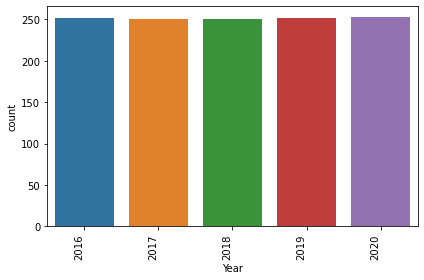

In [25]:
ax=sns.countplot(x='Year',data=df1)
print(df1['Year'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

Year is in range from 2016 to 2022 and figure is showing that there is not much noicable difference betweeen them.


8     112
10    111
3     109
5     107
6     107
7     105
4     103
11    103
12    103
1     102
9     101
2      96
Name: Month, dtype: int64


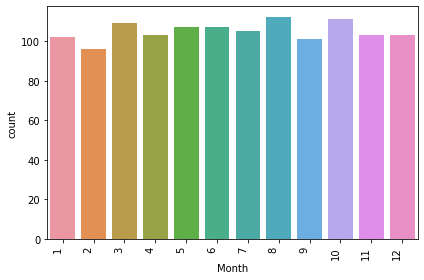

In [26]:
ax=sns.countplot(x='Month',data=df1)
print(df1['Month'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

 Not much differnce in any of the month.

# Now we need only 2 columns for model building that is open and close

In [57]:
training_set = df1.iloc[:, 1:2].values

# Feature Scaling

In [58]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating the Data with timestep

In [61]:
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [60]:
training_data.shape

(1259, 8)

# Predicting using LSTM

In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [65]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))



In [66]:
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)               

In [73]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history=regressor.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split=0.1)

Epoch 1/25
34/34 [==============================] - 55s 265ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 2/25
34/34 [==============================] - 6s 164ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 3/25
34/34 [==============================] - 5s 141ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 4/25
34/34 [==============================] - 5s 141ms/step - loss: 0.0015 - val_loss: 0.0042
Epoch 5/25
34/34 [==============================] - 6s 164ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 6/25
34/34 [==============================] - 5s 148ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 7/25
34/34 [==============================] - 5s 140ms/step - loss: 0.0013 - val_loss: 0.0141
Epoch 8/25
34/34 [==============================] - 5s 158ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 9/25
34/34 [==============================] - 5s 151ms/step - loss: 9.8309e-04 - val_loss: 0.0018
Epoch 10/25
34/34 [==============================] - 4s 129ms/step - loss: 0.0011 - val_loss: 0

# Plotting the Graph

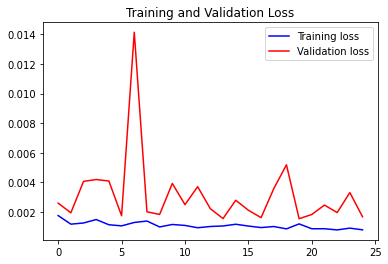

In [74]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


# Prediction on Test data

In [75]:
test_data = df2.iloc[:, 1:2].values

# Applying Inverse Transfromation for obtaining the result

In [77]:
dataset_total = pd.concat((df1['Open'], df2['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df2) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_nasdaq = regressor.predict(X_test)
predicted_nasdaq = sc.inverse_transform(predicted)

In [78]:
predicted_nasdaq

array([[1.1196848e+08],
       [1.1404375e+08],
       [1.1908034e+08],
       [1.2678717e+08],
       [1.3530067e+08],
       [1.4261040e+08],
       [1.4703434e+08],
       [1.4818970e+08],
       [1.4683163e+08],
       [1.4388152e+08],
       [1.3972584e+08],
       [1.3483187e+08],
       [1.2965238e+08],
       [1.2457763e+08],
       [1.1970914e+08],
       [1.1489034e+08]], dtype=float32)

In [80]:
Y_test

array([1.12352719])

# Now Plotting the Results on Graph

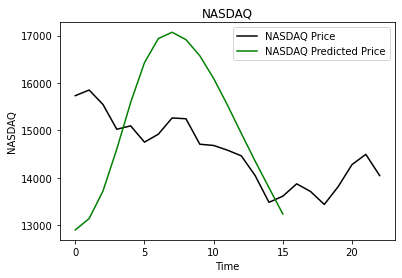

In [82]:
plt.plot(test_data, color = 'black', label = 'NASDAQ Price')
plt.plot(predicted, color = 'green', label = 'NASDAQ Predicted Price')
plt.title('NASDAQ')
plt.xlabel('Time')
plt.ylabel('NASDAQ')
plt.legend()
plt.show()

The above plot shows that NASDAQ will will go down and model prediction also shows that the price will go down.